In [1]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from   sklearn.metrics  import *
from   sklearn.base     import ClassifierMixin,TransformerMixin
from   sklearn.datasets import load_iris,make_classification
from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing import StandardScaler

In [2]:
# função de decisão
def omega(Z):
    return np.where(Z>=0,1,0)

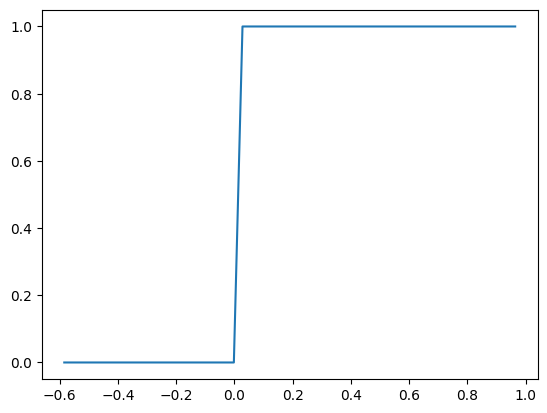

In [3]:
Z = np.random.uniform(-0.6,1,size=(100,1))
plt.plot(np.sort(Z,axis=0),omega(np.sort(Z,axis=0)))
plt.show()

In [4]:
class AlgorithmPerceptron(ClassifierMixin):
    # Taxa de aprendizagem (eta) varia de 0 e 1
    # Número de iteraçoes
    # RandomState : os peso são iniciados aleatoriamente

    w_ = None # Peso das caracteristicas
    b_ = None # Vies 
    m_ = None # Número de instancias das caracteristica
    def __init__(self, eta = 0.001, max_iter = 1_000, random_state = 1):
        self.eta          = eta
        self.max_iter     = max_iter
        self.random_state = random_state
    
    def ErrorsAll(self):
        for iter,value in enumerate(self.erros):
            print(f'Iter {iter}) teve pesos atualizado {value}')

    def fit(self, X:np.array, y:np.array):
        rgen = np.random.RandomState(self.random_state)

        # Inicializando os peso e vies aleatoriamente | ou não
        self.m_ = np.size(X,axis=1)
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=self.m_)
        self.b_ = np.float64(0.)

        self.erros = []
        for _ in range(self.max_iter):
            errors = 0

            for xi, yi in zip(X,y):
                update = self.eta * (yi - self.predict(xi))    
                self.w_ += update * xi    
                self.b_ += update               
                errors += int(update != 0)
            
            self.erros.append(errors)

        return self
    
    def FuncaoDegrau(self, X):
        return np.where( self.SomaPonderada(X)>=0 , 1, 0)
    
    def SomaPonderada(self, X):
        return np.dot(X,self.w_) + self.b_
    
    def predict(self, X):
        return self.FuncaoDegrau(X)

#### $update$
me ira retorna uma valor igual a 0 ou diferente de 0
* Se for igual a $0$ a predição foi correta
* Se não foi incorreta
    * Com isso atualiza os pesos e vies  
    
**Ex:** 

1. **Iter** :
    * $peso =[0,0]$ || $vies = 0$ || $x¹ = [0 ,1]$
    * update = $\eta \cdot( y^{1} - (predict(x^1)))$ = $0.1 \cdot(1-1) = 0$
        * update = 0 , não atualiza os pesos não a erros
        * peso = peso + 0 * ($x^1$) 
        * vies = vies + 0

2. **Iter** : update = $\eta \cdot( y^{1} - (predict(x^1)))$ = $0.1 \cdot(1-1) = 0$
    *  $peso =[0,0]$ || $vies = 0$ || $x¹ = [2 ,1]$
    * update = $\eta \cdot( y^{2} - (predict(x^2)))$ = $0.1 \cdot(1-0) = 0.1$
        * update = 0.1 , atualiza os pesos e vies
        * peso += 0.1 * ($x^2$) = 0.1 * [2,1] = [0.2,0.1]
        * vies += update = 0.1
> continua assim até terminar o número de epocas

### Carregando dataset

In [5]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,encoding='utf-8')

X = data.iloc[:,[1,2]].values
y = data.iloc[:,4]
y = np.where(y=='Iris-setosa',0,1)

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=100, random_state=0)

Perceptron : treinando

In [7]:
perceptron = AlgorithmPerceptron(max_iter=150,eta=0.01)
perceptron.fit(xtrain,ytrain)

In [8]:
predP = perceptron.predict(xtest)

In [9]:
print(classification_report(ytest,predP))
print(accuracy_score(ytest,predP))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


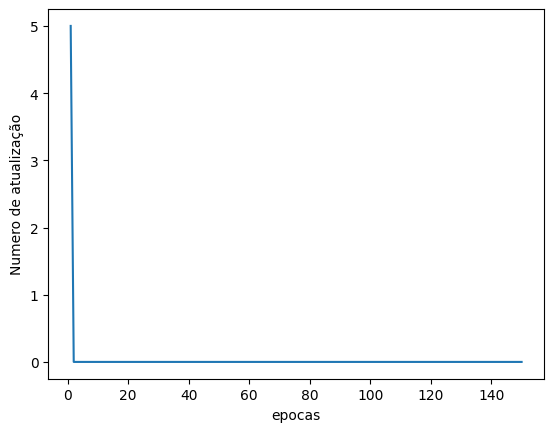

In [10]:
plt.plot(range(1,len(perceptron.erros)+1),perceptron.erros)
plt.ylabel('Numero de atualização')
plt.xlabel('epocas')
plt.show()

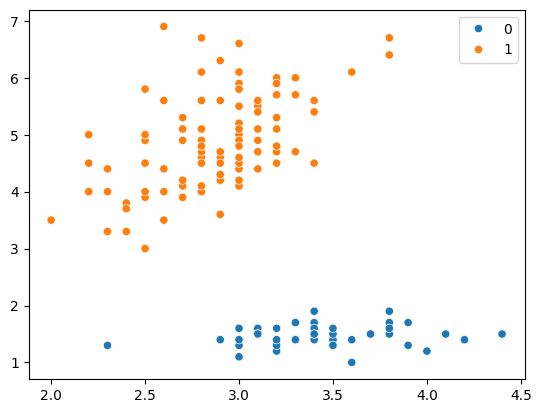

In [11]:
sea.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

In [12]:
from matplotlib.colors import ListedColormap
def plotDecisionRegion(X,y,classifier,resolution=0.02):
    marks = ('o','s','^','v','<')
    color = ('red','blue','lightgreen','gray','cyan')

    cmap  = ListedColormap(colors=color[:len(np.unique(y))])

    x1Min, x1Max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2Min, x2Max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1Min,x1Max,resolution),
        np.arange(x2Min,x2Max,resolution)
    ) 
    x = np.array([xx1.ravel(),xx2.ravel()])
    lab = classifier.predict(x.T)

    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y == cl,0 ],y=X[ y == cl,1 ] , alpha=0.8,c=color[idx],marker=marks[idx],edgecolors='black')
    
    plt.legend(np.unique(y))
    plt.show()

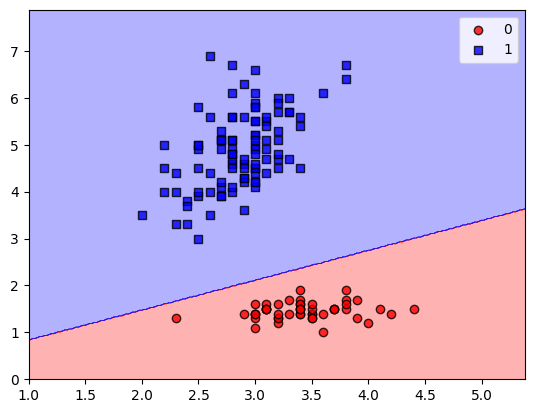

In [13]:
plotDecisionRegion(X,y,perceptron)

### AdalineSDB
* Ele utiliza todos o conj de treinamento para atualizar os pesos e vies do modelo ( gradiente descente em batch)

In [14]:
class AdalineGD(ClassifierMixin):
    """AdalineGD"""
    w_ = None # Peso
    b_ = None # Vies 
    m_ = None # Número de caracteristicas

    def __init__(self, eta = 0.01, max_iter = 1_000, randomState = 1, tol=1e-4):
        self.eta         = eta
        self.max_iter    = max_iter
        self.randomState = randomState
        self.tol         = tol
    
    def fit(self, X, y):
        
        rgen = np.random.RandomState(self.randomState)

        self.m_ = np.size(X,axis=1)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=self.m_)
        self.b_ = np.float64(0.0)

        self.losses_ = [] # perdas

        for iter in range(self.max_iter):
            somaPonderada = self.SomaPoderada(X)
            saida = self.ativacaoLinear(somaPonderada)

            erros = y - saida
            self.w_ += self.eta * 2.0 * X.T.dot(erros) / np.size(X, axis=0)
            self.b_ += self.eta * 2.0 * erros.mean()

            loss = np.mean( erros**2 )

            self.losses_.append(loss)

            if iter >= 2:
                if abs( self.losses_[len(self.losses_)-1] - self.losses_[len(self.losses_)-2] ) <= self.tol:break
        
        return self

    def ativacaoLinear(self, X):
        return X
    
    def SomaPoderada(self, X):
        return np.dot(X,self.w_) + self.b_
    
    def predict(self, X):
        return np.where( self.ativacaoLinear(self.SomaPoderada(X))>=0.5 ,1 ,0)

In [15]:
ada = AdalineGD(max_iter=100,eta=0.001,tol=1e-10)
ada.fit(xtrain,ytrain)

In [16]:
predAda = ada.predict(xtest) 

In [17]:
print(classification_report(ytest,predAda))
print(accuracy_score(ytest,predAda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


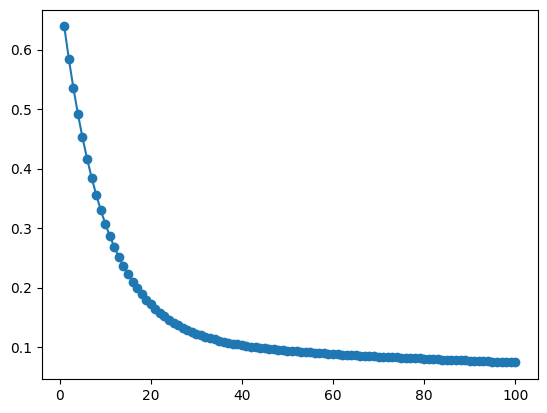

In [18]:
plt.plot(range(1,len(ada.losses_)+1),ada.losses_,marker='o')
plt.show()

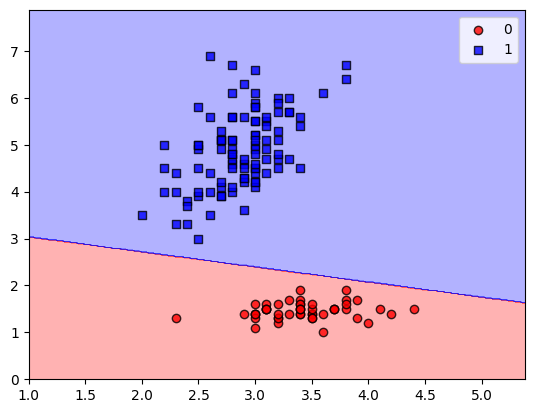

In [19]:
plotDecisionRegion(X,y,ada)

### OBS
Importante deixar as caracteristicas nua mesma escala para que convirja mais rapido

##### padronização
$$
\frac{x_i - \mu_i}{\sigma_i}
$$

In [20]:
class Padronizacao(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return (X - np.mean(X))/np.std(X)

In [21]:
xtrain = Padronizacao().fit_transform(xtrain)
xtest  = Padronizacao().fit_transform(xtest)

In [22]:
ada = AdalineGD(max_iter=1000,eta=0.01,tol=1e-5)
ada.fit(xtrain,ytrain)
predAda = ada.predict(xtest)

In [23]:
print(classification_report(ytest,predAda))
print(accuracy_score(ytest,predAda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


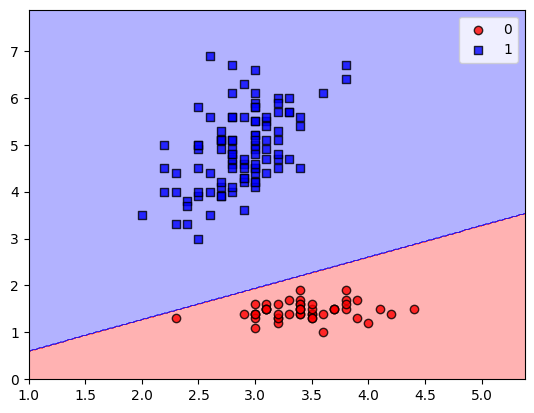

In [24]:
plotDecisionRegion(X,y,ada)

&nbsp;

### Adaline Gradiente Descendente estocasticos

In [25]:
class AdalineSGD(ClassifierMixin):
    w_ = None
    b_ = None
    m_ = None
    def __init__(self, eta=0.01, max_iter=1_00, shuffle=True, randomState=None):
        self.eta         = eta
        self.max_iter    = max_iter
        self.shuffle     = shuffle
        self.randomState = randomState # funciona da mesma forma do train_test_split
        self.pesoInicializado = False

    def fit(self, X, y):
        self.m_ = np.size(X , axis=1)
        self.inicializaPesos()
        
        self.losses_ = []

        for iter in range(self.max_iter):
            if self.shuffle:# Embaralha o X e y
                X, y = self._shuffle(X,y)
            loss = []

            for xi , yi in zip(X, y):
                loss.append(self._atualizaPesos(xi, yi))
            media = np.mean(loss)
            self.losses_.append(media)

        return self
    
    def partial_fit(self, X, y):
        if not self.pesoInicializado:
            self.inicializaPesos(np.size(X, axis=1))

        if np.size(y.ravel(), axis=0) > 1:
            for xi, yi in zip(X ,y):# xi = caracteristicas yi = valor alvo
                self._atualizaPesos(xi, yi)
        else: 
            self._atualizaPesos(X, y)

        return self
            
    def inicializaPesos(self):
        self.rgen = np.random.RandomState( seed=self.randomState )
    
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=self.m_)
        self.b_ = np.float64(0.0)
        print(self.w_)
        self.pesoInicializado = True

    def _atualizaPesos(self, xi, yi):
        
        entrada = self.ativacaoLinear(self.somaPonderada(xi))
        error   = ( yi - entrada )

        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * (error)

        return ( error ** 2 )#Retorna a perda
    
    def _shuffle(self, X, y):# Embaralhar os indice do conjunto de treinamento
        index = self.rgen.permutation(len(y))
        return X[index], y[index]
    
    def ativacaoLinear(self, X):
        return X
    
    def somaPonderada(self, X):
        return np.dot(X,self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.ativacaoLinear(self.somaPonderada(X))>=0.5,1,0)

In [26]:
estocatico = AdalineSGD(max_iter=10)
estocatico.fit(xtrain,ytrain)

[-0.01830096 -0.01932375]


In [27]:
print('Pesos :',estocatico.w_)
print('Bias  :',estocatico.b_)

Pesos : [-0.32768638  0.28122944]
Bias  : 0.4869621192672498


In [28]:
for i,ero in enumerate(estocatico.losses_):
    print(f'iter {i} = ',ero)

iter 0 =  0.132009248552514
iter 1 =  0.027226657348121464
iter 2 =  0.025520953541708198
iter 3 =  0.026132417911617866
iter 4 =  0.025642376224664948
iter 5 =  0.025318666638541473
iter 6 =  0.025289715762240234
iter 7 =  0.02472615390142634
iter 8 =  0.025012175982311313
iter 9 =  0.024116207497238182


In [29]:
pred = estocatico.predict(xtest)

In [30]:
print(classification_report(ytest,pred))
print(accuracy_score(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


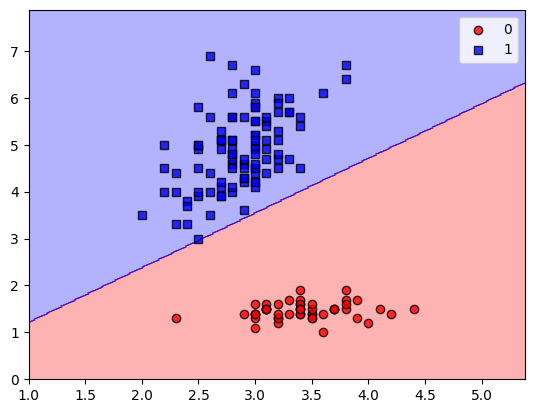

In [31]:
plotDecisionRegion(X,y,estocatico)

In [32]:
estocatico.partial_fit(X[0,:],y[0])

print('Pesos :',estocatico.w_)
print('Bias  :',estocatico.b_)

Pesos : [-0.30905105  0.28868358]
Bias  : 0.49228649921399925


In [33]:
pred = estocatico.predict(X)

In [34]:
print(classification_report(y,pred))
print(accuracy_score(y,pred))
print(confusion_matrix(y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       100

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

1.0
[[ 50   0]
 [  0 100]]


In [35]:
for i,ero in enumerate(estocatico.losses_):
    print(f'iter {i} = ',ero)

iter 0 =  0.132009248552514
iter 1 =  0.027226657348121464
iter 2 =  0.025520953541708198
iter 3 =  0.026132417911617866
iter 4 =  0.025642376224664948
iter 5 =  0.025318666638541473
iter 6 =  0.025289715762240234
iter 7 =  0.02472615390142634
iter 8 =  0.025012175982311313
iter 9 =  0.024116207497238182


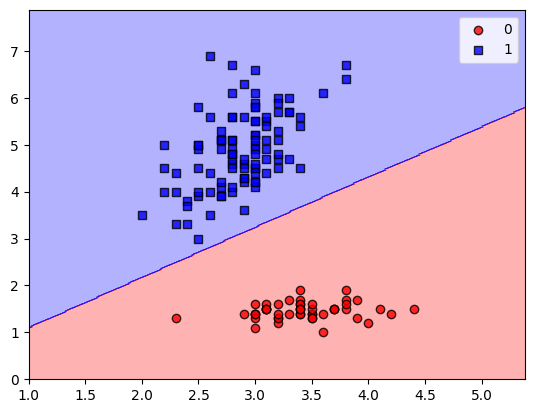

In [36]:
plotDecisionRegion(X,y,estocatico)